In [172]:
#import system files
import sys
# !{sys.executable} -m pip install pandas

In [173]:
#load libraries
import pandas as pd
import math


In [174]:
#load the activity dataset
df1 = pd.read_csv("/Users/whitegg/Documents/GitHub/Project/FinalSemesterProject/ehact_2014.csv")
df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120719 entries, 0 to 120718
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   tucaseid      120719 non-null  int64
 1   tuactivity_n  120719 non-null  int64
 2   eueatsum      120719 non-null  int64
 3   euedur        120719 non-null  int64
 4   euedur24      120719 non-null  int64
dtypes: int64(5)
memory usage: 4.6 MB


In [175]:
#load respondent dataset
df2 = pd.read_csv("/Users/whitegg/Documents/GitHub/Project/FinalSemesterProject/ehresp_2014.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11212 entries, 0 to 11211
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tucaseid     11212 non-null  int64  
 1   tulineno     11212 non-null  int64  
 2   eeincome1    11212 non-null  int64  
 3   erbmi        11212 non-null  float64
 4   erhhch       11212 non-null  int64  
 5   erincome     11212 non-null  int64  
 6   erspemch     11212 non-null  int64  
 7   ertpreat     11212 non-null  int64  
 8   ertseat      11212 non-null  int64  
 9   ethgt        11212 non-null  int64  
 10  etwgt        11212 non-null  int64  
 11  eudietsoda   11212 non-null  int64  
 12  eudrink      11212 non-null  int64  
 13  eueat        11212 non-null  int64  
 14  euexercise   11212 non-null  int64  
 15  euexfreq     11212 non-null  int64  
 16  eufastfd     11212 non-null  int64  
 17  eufastfdfrq  11212 non-null  int64  
 18  euffyday     11212 non-null  int64  
 19  eufd

In [176]:
#load weight dataset
df3 = pd.read_csv("/Users/whitegg/Documents/GitHub/Project/FinalSemesterProject/ehwgts_2014.csv")
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11212 entries, 0 to 11211
Columns: 161 entries, tucaseid to eufinlwgt160
dtypes: float64(160), int64(1)
memory usage: 13.8 MB


In [177]:
#filter bmi, height and weight
df = df2[["erbmi", "euhgt", "euwgt"]]
df

,erbmi,euhgt,euwgt
0,33.200001,60,170
1,22.700001,63,128
2,49.400002,62,270
3,-1.000000,64,-2
4,31.000000,69,210
...,...,...,...
11207,27.400000,68,180
11208,24.000000,64,140
11209,22.200001,67,142
11210,23.400000,71,168


In [178]:
#check information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11212 entries, 0 to 11211
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   erbmi   11212 non-null  float64
 1   euhgt   11212 non-null  int64  
 2   euwgt   11212 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 262.9 KB


In [179]:
#check the distribution of the dataset
df.describe()

,erbmi,euhgt,euwgt
count,11212.000000,11212.000000,11212.000000
mean,26.291250,65.628255,168.182572
std,8.737788,9.144713,56.893436
min,-1.000000,-3.000000,-5.000000
25%,23.000000,63.000000,140.000000
50%,26.500000,66.000000,168.000000
75%,30.400000,70.000000,200.000000
max,73.599998,77.000000,340.000000


In [180]:
#remove duplicate
# df = df.drop_duplicates()

In [181]:
#check the dataset after duplicate removal
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11212 entries, 0 to 11211
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   erbmi   11212 non-null  float64
 1   euhgt   11212 non-null  int64  
 2   euwgt   11212 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 262.9 KB


In [182]:
#filter heights less than 21 and weight less than 5
df = df[(df.euhgt > 21) & (df.euwgt > 5)]
df

,erbmi,euhgt,euwgt
0,33.200001,60,170
1,22.700001,63,128
2,49.400002,62,270
4,31.000000,69,210
5,30.700001,71,220
...,...,...,...
11207,27.400000,68,180
11208,24.000000,64,140
11209,22.200001,67,142
11210,23.400000,71,168


In [183]:
#Check resulting dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10637 entries, 0 to 11211
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   erbmi   10637 non-null  float64
 1   euhgt   10637 non-null  int64  
 2   euwgt   10637 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 332.4 KB


In [184]:
#check for na values
df.isna().value_counts()

erbmi  euhgt  euwgt
False  False  False    10637
Name: count, dtype: int64

In [185]:
#drop na values
df = df.dropna(thresh=len(df.columns) // 2)

In [186]:
#check result after na was removed
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10637 entries, 0 to 11211
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   erbmi   10637 non-null  float64
 1   euhgt   10637 non-null  int64  
 2   euwgt   10637 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 332.4 KB


In [187]:
#recheck the distribution of the dataset
df.describe()


,erbmi,euhgt,euwgt
count,10637.000000,10637.000000,10637.000000
mean,27.766522,66.689292,176.277146
std,6.167176,4.131012,44.267974
min,13.000000,56.000000,98.000000
25%,23.600000,64.000000,145.000000
50%,26.600000,66.000000,170.000000
75%,30.700001,70.000000,200.000000
max,73.599998,77.000000,340.000000


In [188]:
#check the correlations of the features in the dataset
correlation_matrix = df.corr()
print(correlation_matrix)


          erbmi     euhgt     euwgt
erbmi  1.000000 -0.014232  0.858116
euhgt -0.014232  1.000000  0.488879
euwgt  0.858116  0.488879  1.000000


In [189]:
#Apply Linear Regression to check intercept and coefficient

from sklearn.linear_model import LinearRegression

X = df[["euhgt", "euwgt"]]
y = df["erbmi"]

model = LinearRegression()
model.fit(X, y)

# Check the coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Intercept: 56.59647923201655
Coefficients: [-0.85090982  0.15836776]


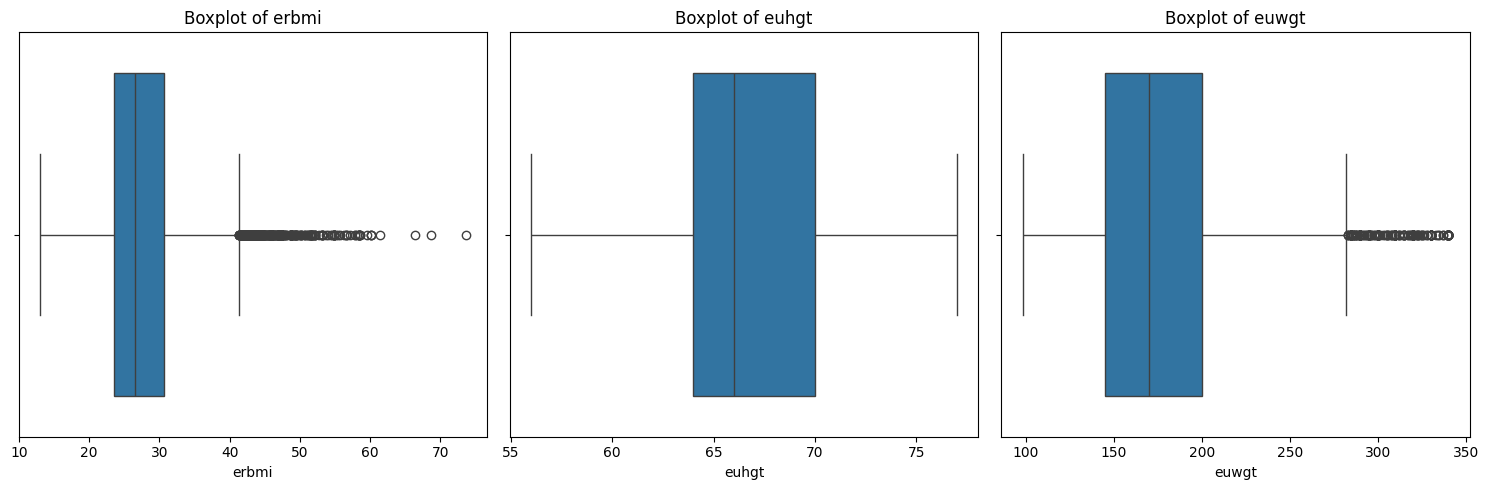

In [190]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns



# List of columns to check for outliers
columns = ['erbmi', 'euhgt', 'euwgt']

# Create a figure and axis for each boxplot
plt.figure(figsize=(15, 5))

for i, column in enumerate(columns):
    plt.subplot(1, len(columns), i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.savefig("Boxplot") 
plt.show()

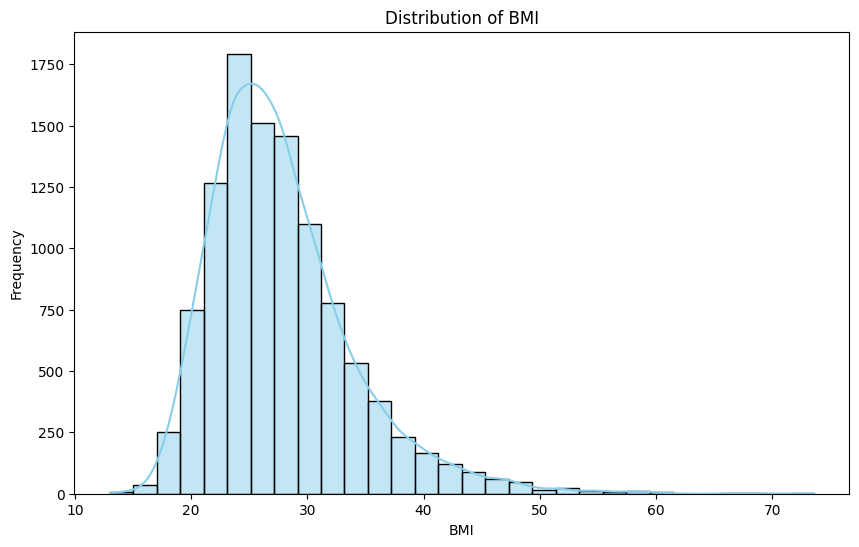

In [191]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

#plot histogram to to diplay the distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['erbmi'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.savefig("Distribution of BMI") 
plt.show()



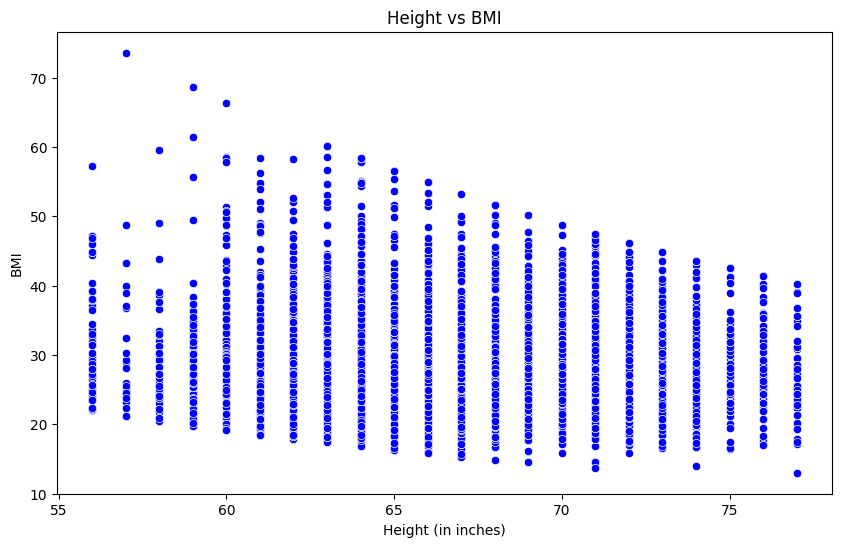

In [192]:
#plot scatter to to diplay the relationship of Height and BMI

plt.figure(figsize=(10, 6))
sns.scatterplot(x='euhgt', y='erbmi', data=df, color='blue')
plt.title('Height vs BMI')
plt.xlabel('Height (in inches)')
plt.ylabel('BMI')
plt.savefig("Height vs BMI") 
plt.show()



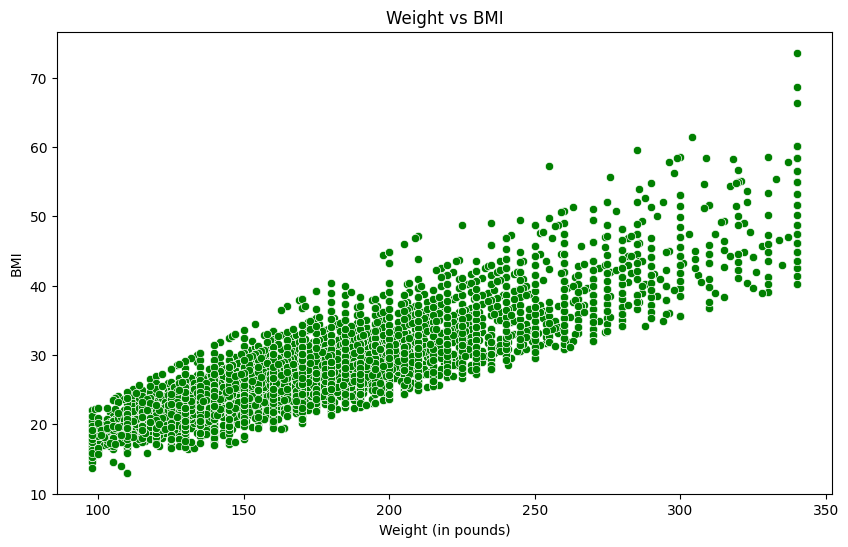

In [193]:
#plot scatterplot to diplay the relationship of Weight and BMI

plt.figure(figsize=(10, 6))
sns.scatterplot(x='euwgt', y='erbmi', data=df, color='green')
plt.title('Weight vs BMI')
plt.xlabel('Weight (in pounds)')
plt.ylabel('BMI')
plt.savefig("Weight vs BMI") 
plt.show()




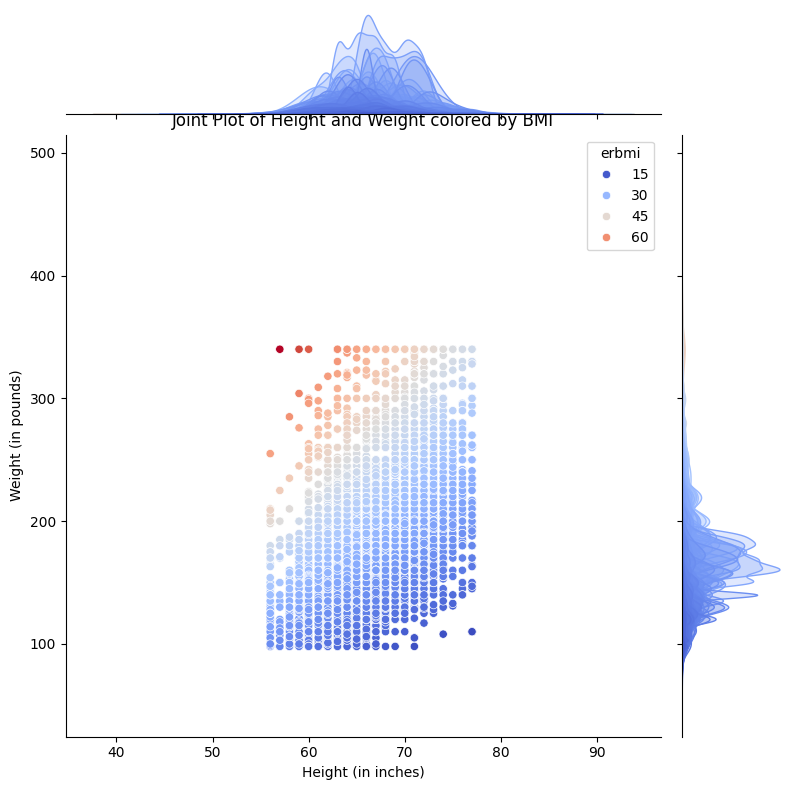

In [194]:
#plot jointplot to diplay the relationship of Height, Weight and BMI

sns.jointplot(x='euhgt', y='euwgt', data=df, kind='scatter', hue='erbmi', palette='coolwarm', height=8)
plt.title('Joint Plot of Height and Weight colored by BMI')
plt.xlabel('Height (in inches)')
plt.ylabel('Weight (in pounds)')
plt.savefig("Joint Plot of Height and Weight colored by BMI") 
plt.show()



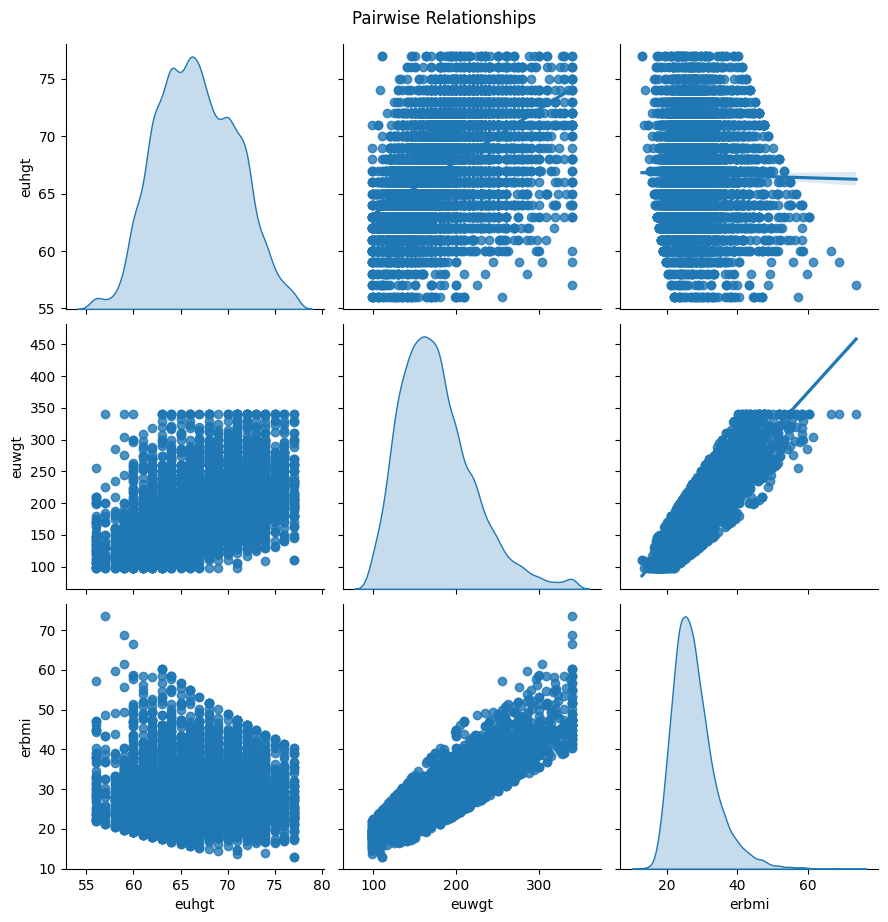

In [195]:
#plot pairplot to diplay the relationship of Height, Weight and BMI
sns.pairplot(df[['euhgt', 'euwgt', 'erbmi']], kind='reg', diag_kind='kde', height=3)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.savefig("Pairwise Relationships") 
plt.show()


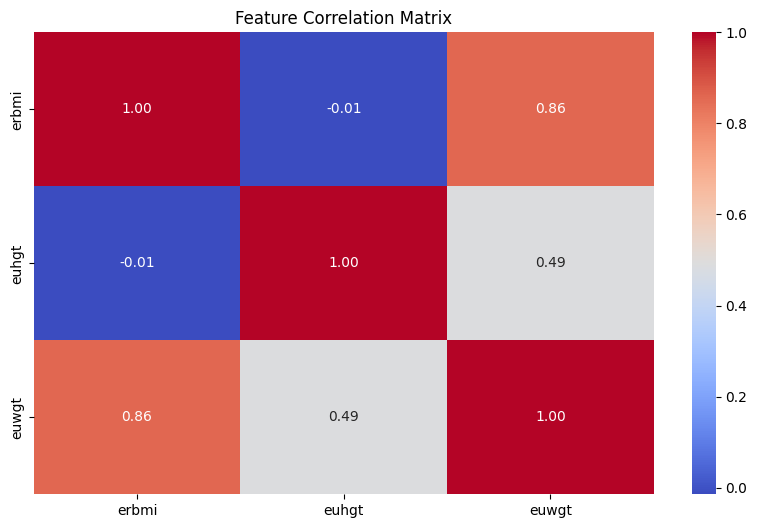

In [196]:
#visualize the correlation of the features
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.savefig("Feature Correlation Matrix") 
plt.show()



In [197]:

dframe = df.copy()
dframe

,erbmi,euhgt,euwgt
0,33.200001,60,170
1,22.700001,63,128
2,49.400002,62,270
4,31.000000,69,210
5,30.700001,71,220
...,...,...,...
11207,27.400000,68,180
11208,24.000000,64,140
11209,22.200001,67,142
11210,23.400000,71,168


In [198]:
#import Library
import pandas as pd

# Define the function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal Weight'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    elif bmi >= 30:
        return 'Obese'
    else:
        return 'Invalid'

# Apply the function to create a new column in the DataFrame
df['bmi_category'] = df['erbmi'].apply(categorize_bmi)

# Display the first few rows to verify
# print(df[['erbmi', 'bmi_category']].head())


In [199]:
df

,erbmi,euhgt,euwgt,bmi_category
0,33.200001,60,170,Obese
1,22.700001,63,128,Normal Weight
2,49.400002,62,270,Obese
4,31.000000,69,210,Obese
5,30.700001,71,220,Obese
...,...,...,...,...
11207,27.400000,68,180,Overweight
11208,24.000000,64,140,Normal Weight
11209,22.200001,67,142,Normal Weight
11210,23.400000,71,168,Normal Weight


In [200]:
df.bmi_category.value_counts()

bmi_category
Overweight       3726
Normal Weight    3601
Obese            3128
Underweight       182
Name: count, dtype: int64

In [201]:
from sklearn.preprocessing import StandardScaler
# Normalization of height and weight
scaler = StandardScaler()
df[['euhgt', 'euwgt']] = scaler.fit_transform(df[['euhgt', 'euwgt']])

In [202]:
print(df.describe())

              erbmi         euhgt         euwgt
count  10637.000000  1.063700e+04  1.063700e+04
mean      27.766522 -1.599172e-15 -4.642542e-17
std        6.167176  1.000047e+00  1.000047e+00
min       13.000000 -2.587694e+00 -1.768340e+00
25%       23.600000 -6.510314e-01 -7.065744e-01
50%       26.600000 -1.668658e-01 -1.418055e-01
75%       30.700001  8.014655e-01  5.359172e-01
max       73.599998  2.496045e+00  3.698623e+00


/var/folders/xy/ncydkx6d5bs0jt6x902q36d40000gn/T/ipykernel_50965/4221007263.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bmi_counts.index, y=bmi_counts.values, palette='viridis')


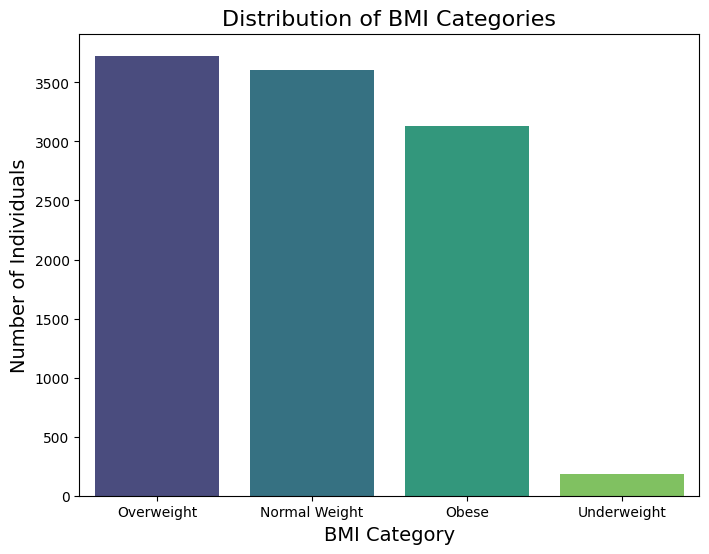

In [203]:
# Count the number of occurrences in each BMI category
bmi_counts = df['bmi_category'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=bmi_counts.index, y=bmi_counts.values, palette='viridis')

# Add titles and labels
plt.title('Distribution of BMI Categories', fontsize=16)
plt.xlabel('BMI Category', fontsize=14)
plt.ylabel('Number of Individuals', fontsize=14)
plt.savefig("Distribution of BMI Categories") 
# Show the plot
plt.show()


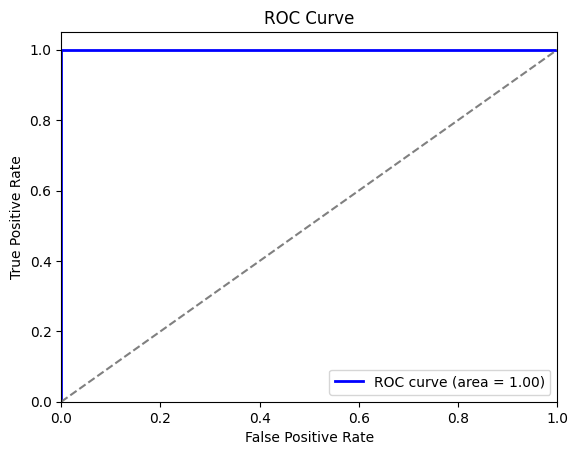

In [204]:
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode the bmi_category into numerical labels (e.g., 0: Normal Weight, 1: Obese)
label_encoder = LabelEncoder()
df['bmi_category_encoded'] = label_encoder.fit_transform(df['bmi_category'])

# Let's consider "Obese" as the positive class for the ROC-AUC curve
df['bmi_category_encoded'] = df['bmi_category_encoded'].apply(lambda x: 1 if x == label_encoder.transform(['Obese'])[0] else 0)

# Calculate ROC-AUC
fpr, tpr, thresholds = roc_curve(df['bmi_category_encoded'], df['erbmi'])
roc_auc = roc_auc_score(df['bmi_category_encoded'], df['erbmi'])

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig("ROC Curve") 
plt.show()

In [205]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

# # Perform ANOVA on BMI categories
# model = ols('erbmi ~ C(bmi_category)', data=df).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# print(anova_table)

# # Post-hoc test
# tukey = pairwise_tukeyhsd(df['erbmi'], df['bmi_category'], alpha=0.05)
# print(tukey)

In [206]:
tukey.plot_simultaneous()
plt.title('Tukey HSD Test for Weight across BMI Categories')
plt.savefig("Tukey HSD Test for Weight across BMI Categories") 
plt.show()

NameError: name 'tukey' is not defined

In [207]:
from scipy.stats import f_oneway

# Group the data by BMI categories
underweight = df[df['bmi_category'] == 'Underweight']['euwgt']
normal_weight = df[df['bmi_category'] == 'Normal Weight']['euwgt']
overweight = df[df['bmi_category'] == 'Overweight']['euwgt']
obese = df[df['bmi_category'] == 'Obese']['euwgt']

# Perform ANOVA
f_stat, p_value = f_oneway(underweight, normal_weight, overweight, obese)
print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 4876.875110285574, P-value: 0.0


In [208]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# Model Training and Evaluation

X = df[['euhgt', 'euwgt']]
y = df['erbmi']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'R2': r2,
        'MAE': mae,
        'RMSE': rmse,
        'MSE': mse
    }

# Print the results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  R2 = {metrics['R2']}")
    print(f"  MAE = {metrics['MAE']}")
    print(f"  RMSE = {metrics['RMSE']}")
    print(f"  MSE = {metrics['MSE']}")



NameError: name 'mean_absolute_error' is not defined

In [ ]:
# Optional: Hyperparameter Tuning (Example with Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Best parameters for Gradient Boosting: {grid_search.best_params_}")

In [209]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Split the data into training and test sets
X = df[['euhgt', 'euwgt']]
y = df['erbmi']
y_category = df['bmi_category']  # Actual BMI categories

X_train, X_test, y_train, y_test, y_train_category, y_test_category = train_test_split(X, y, y_category, test_size=0.2, random_state=42)

# Initialize dictionaries to store metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal Weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    elif bmi >= 30:
        return 'Obese'
    else:
        return 'Invalid'

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Convert the predicted BMI to categories
    y_pred_category = [categorize_bmi(bmi) for bmi in y_pred]
    
    # Calculate metrics
    accuracy_scores[name] = accuracy_score(y_test_category, y_pred_category)
    precision_scores[name] = precision_score(y_test_category, y_pred_category, average='weighted')
    recall_scores[name] = recall_score(y_test_category, y_pred_category, average='weighted')
    f1_scores[name] = f1_score(y_test_category, y_pred_category, average='weighted')

# Display the results
print("Model Performance Metrics:")
for name in models.keys():
    print(f"\n{name}:")
    print(f"  Accuracy: {accuracy_scores[name]}")
    print(f"  Precision: {precision_scores[name]}")
    print(f"  Recall: {recall_scores[name]}")
    print(f"  F1-Score: {f1_scores[name]}")


/Users/whitegg/Documents/GitHub/Project/FinalSemesterProject/Webapp/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/whitegg/Documents/GitHub/Project/FinalSemesterProject/Webapp/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/whitegg/Documents/GitHub/Project/FinalSemesterProject/Webapp/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_divisi

Model Performance Metrics:

Linear Regression:
  Accuracy: 0.9219924812030075
  Precision: 0.9408808384397225
  Recall: 0.9219924812030075
  F1-Score: 0.9310204878312235

Ridge Regression:
  Accuracy: 0.9210526315789473
  Precision: 0.939742696177607
  Recall: 0.9210526315789473
  F1-Score: 0.9300487632964537

Lasso Regression:
  Accuracy: 0.8294172932330827
  Precision: 0.8626542855611378
  Recall: 0.8294172932330827
  F1-Score: 0.8303104320591802

Decision Tree:
  Accuracy: 0.9957706766917294
  Precision: 0.9972188554175964
  Recall: 0.9957706766917294
  F1-Score: 0.9964819549981622

Random Forest:
  Accuracy: 0.9920112781954887
  Precision: 0.9971886700765031
  Recall: 0.9920112781954887
  F1-Score: 0.9945850695370666

Support Vector Machine:
  Accuracy: 0.987312030075188
  Precision: 0.9981081300373235
  Recall: 0.987312030075188
  F1-Score: 0.9926777699246457

Gradient Boosting:
  Accuracy: 0.9741541353383458
  Precision: 0.9878034147573196
  Recall: 0.9741541353383458
  F1-Score:

/Users/whitegg/Documents/GitHub/Project/FinalSemesterProject/Webapp/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [211]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

results = []

# Loop through models and calculate R2 and MSE
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    
    r2 = r2_score(y_test, y_pred)  # Calculate R²
    mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
    
    results.append({'Model': model_name, 'R²': r2, 'MSE': mse})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)


# Display the table of metrics
results_df

,Model,R²,MSE
0,Linear Regression,0.983780,0.650726
1,Ridge Regression,0.983781,0.650683
2,Lasso Regression,0.879280,4.843124
3,Decision Tree,0.998190,0.072613
4,Random Forest,0.998620,0.055364
5,Support Vector Machine,0.996098,0.156563
6,Gradient Boosting,0.998567,0.057484


In [ ]:
!{sys.executable} -m pip install statsmodels

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Ensure that BMI categories are correctly assigned
df['bmi_category'] = df['erbmi'].apply(categorize_bmi)

# Create a DataFrame for the Tukey HSD test
data_for_tukey = df[['euwgt', 'bmi_category']]
data_for_tukey = data_for_tukey.dropna()  # Drop any missing values if necessary


In [ ]:
tukey = pairwise_tukeyhsd(endog=data_for_tukey['euwgt'],
                          groups=data_for_tukey['bmi_category'],
                          alpha=0.05)

# Print the results
print(tukey)


In [ ]:
tukey.plot_simultaneous()
plt.title('Tukey HSD Test for Weight across BMI Categories')
plt.show()


In [ ]:
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

In [ ]:

!{sys.executable} -m pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np


# Handle missing and invalid values
df = df[(df['euhgt'] > 0) & (df['euwgt'] > 0)]

# Features and target
X = df[['euhgt', 'euwgt']]
y = df['erbmi']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

# Print the results
for name, mse in results.items():
    print(f"{name}: MSE = {mse}")

# Find the best model based on MSE
best_model_name = min(results, key=results.get)
print(f"Best model: {best_model_name} with MSE = {results[best_model_name]}")


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Train and evaluate each model using R², MAE, and RMSE

regression_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store the results
    regression_results[name] = {
        'R²': r2,
        'MAE': mae,
        'RMSE': rmse
    }

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(regression_results).T

# Display the results
print(results_df)

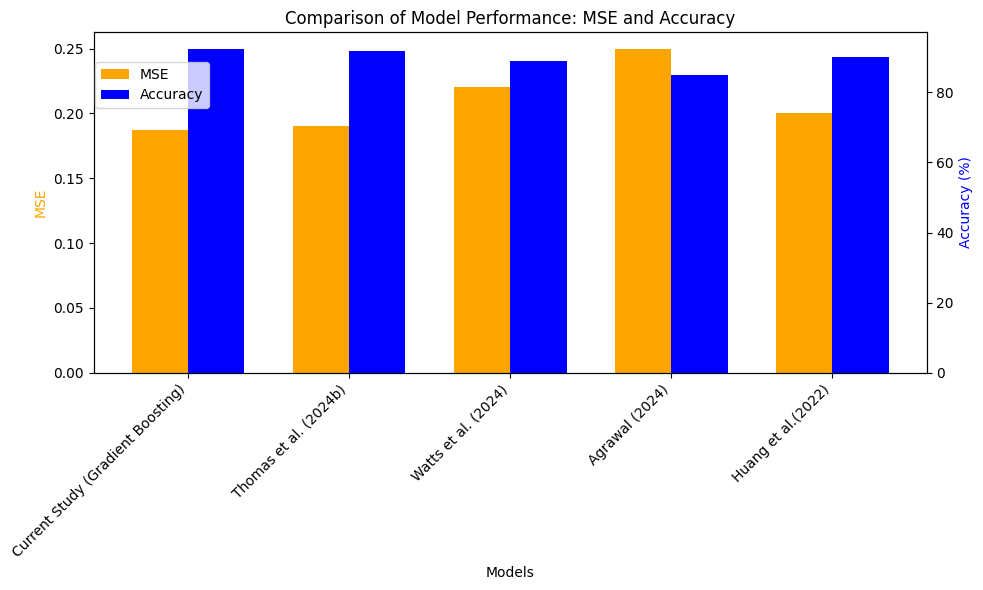

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plot
models = [
    "Current Study (Gradient Boosting)", 
    "Thomas et al. (2024b)", 
    "Watts et al. (2024)", 
    "Agrawal (2024)", 
    "Huang et al.(2022)"
]
mse_values = [0.1868, 0.1900, 0.2200, 0.2500, 0.2000]
accuracy_values = [92.5, 91.7, 89.0, 85.0, 90.0]

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set positions for the bars
x = np.arange(len(models))
width = 0.35  # width of the bars

# Plot MSE bars
bar1 = ax1.bar(x - width/2, mse_values, width, label='MSE', color='orange')

# Plot Accuracy bars
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, accuracy_values, width, label='Accuracy', color='blue')

# Labels and Titles
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE', color='orange')
ax2.set_ylabel('Accuracy (%)', color='blue')
ax1.set_title('Comparison of Model Performance: MSE and Accuracy')

# Set x-axis labels and rotate
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha="right")

# Adding a legend
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.savefig("Comparison of Model Performance: MSE and Accuracy") 
plt.show()


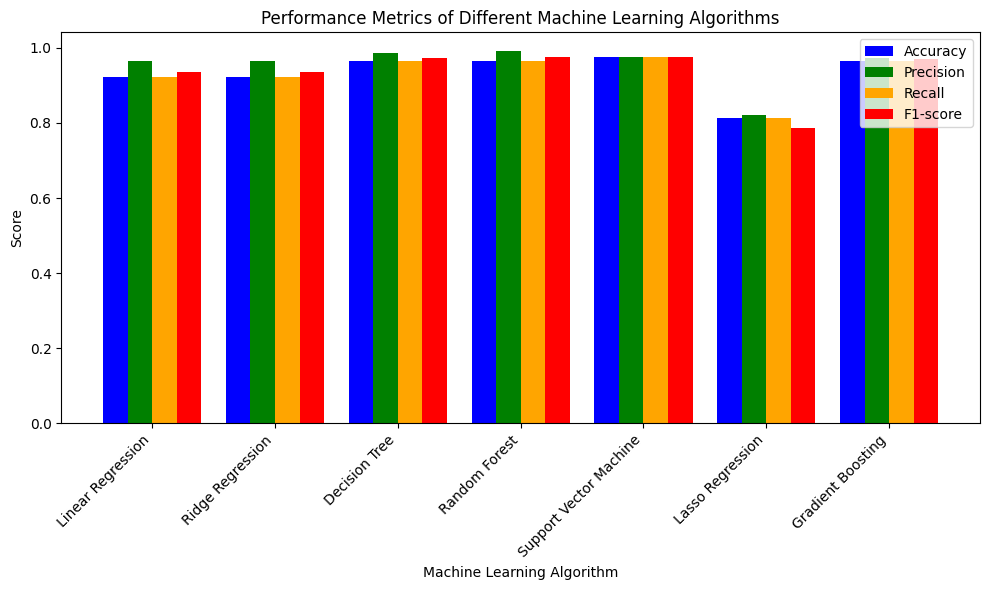

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
algorithms = [
    "Linear Regression", 
    "Ridge Regression", 
    "Decision Tree", 
    "Random Forest", 
    "Support Vector Machine", 
    "Lasso Regression", 
    "Gradient Boosting"
]
accuracy = [0.9231, 0.9231, 0.9658, 0.9658, 0.9744, 0.8120, 0.9658]
precision = [0.9639, 0.9651, 0.9858, 0.9916, 0.9744, 0.8202, 0.9741]
recall = [0.9231, 0.9231, 0.9658, 0.9658, 0.9744, 0.8120, 0.9658]
f1_score = [0.9352, 0.9365, 0.9725, 0.9767, 0.9744, 0.7874, 0.9699]

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Set positions for bars
x = np.arange(len(algorithms))
width = 0.2

# Plotting each metric as bars
ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy', color='blue')
ax.bar(x - 0.5 * width, precision, width, label='Precision', color='green')
ax.bar(x + 0.5 * width, recall, width, label='Recall', color='orange')
ax.bar(x + 1.5 * width, f1_score, width, label='F1-score', color='red')

# Labeling and formatting
ax.set_xlabel('Machine Learning Algorithm')
ax.set_ylabel('Score')
ax.set_title('Performance Metrics of Different Machine Learning Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(algorithms, rotation=45, ha="right")
ax.legend()

# Show plot
plt.tight_layout()
plt.savefig("Performance Metrics of Different Machine Learning Algorithms") 
plt.show()


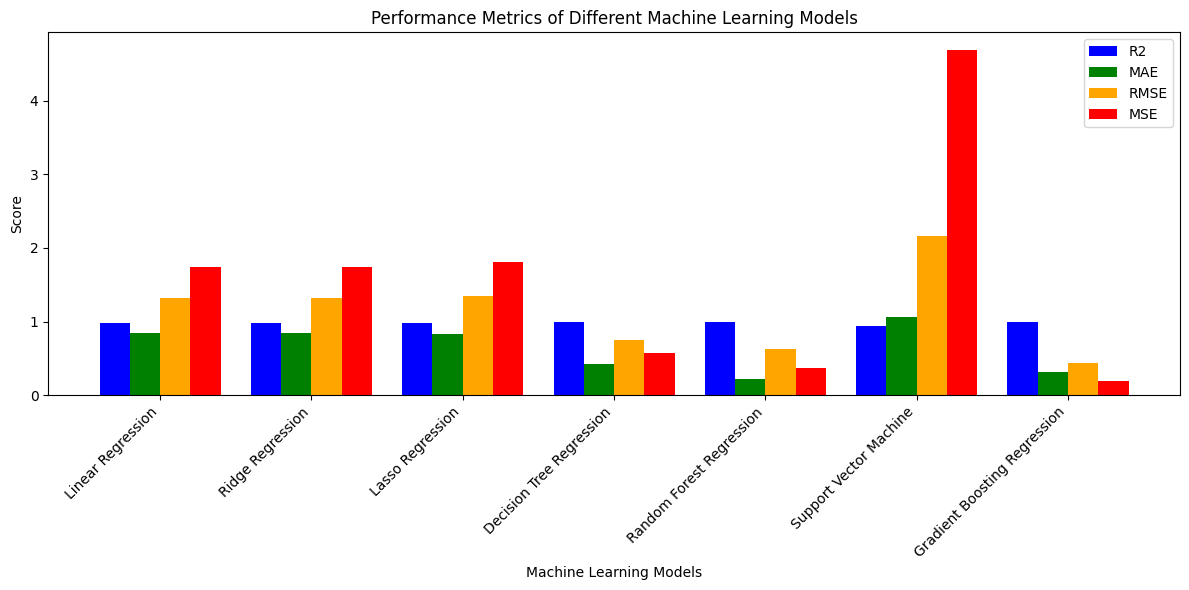

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = [
    "Linear Regression", 
    "Ridge Regression", 
    "Lasso Regression", 
    "Decision Tree Regression", 
    "Random Forest Regression", 
    "Support Vector Machine", 
    "Gradient Boosting Regression"
]
r2_values = [0.976326, 0.976326, 0.975357, 0.992216, 0.994635, 0.936164, 0.999746]
mae_values = [0.847728, 0.847713, 0.832448, 0.429798, 0.224768, 1.067960, 0.314084]
rmse_values = [1.319542, 1.319546, 1.346274, 0.756621, 0.628138, 2.166824, 0.432238]
mse_values = [1.7411, 1.7412, 1.8124, 0.5779, 0.3710, 4.6915, 0.1868]

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Set positions for bars
x = np.arange(len(models))
width = 0.2

# Plotting each metric as bars
ax.bar(x - 1.5 * width, r2_values, width, label='R2', color='blue')
ax.bar(x - 0.5 * width, mae_values, width, label='MAE', color='green')
ax.bar(x + 0.5 * width, rmse_values, width, label='RMSE', color='orange')
ax.bar(x + 1.5 * width, mse_values, width, label='MSE', color='red')

# Labeling and formatting
ax.set_xlabel('Machine Learning Models')
ax.set_ylabel('Score')
ax.set_title('Performance Metrics of Different Machine Learning Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

# Show plot
plt.tight_layout()
plt.savefig("Performance Metrics of Different Machine Learning Models") 
plt.show()
